<a href="https://colab.research.google.com/github/bindusri-c/Data_Vizualization/blob/main/Copy_of_Classification_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification -   Evaluation

## --> Dataset information
Load dataset_DT.csv<br>
The data is ordered by date (day, month)<br>
### Features:
* age           --> age
* job           --> type of Job
* marital       --> marital status
* education     --> highest education finished  
* default       --> already has credit in default?
* balance       --> account balance
* housing       --> taken housing loan?
* loan          --> taken personal loan?
* contact       --> communication via...
* day           --> day of last contact  
* month         --> month of last contact
* duration      --> duration of last contact
* campaign      --> number of contacts made to the client during the campaign
* pdays         --> number of days that passed by after the client was last contacted from a previous campaign (999 means client wasn't previously contacted)
* previous      --> number of contacts performed before this campaign and for this client
* poutcome      --> outcome of the previous marketing campaign
### Target variable:
* y --> has the client subscribed a term deposit?


## --> Programming Assignment Details

1) For this assignment use colab

2) You can use libraries: Numpy, Pandas, Scikit-learn, Matplotlib,.. and Seaborn

3) Make sure to write about 2-3 lines to explain any kind of visualization

### Hints -

1) Apart from null values, the dataset consists of "unknown" (string) values in multiple columns. You need to handle them as a part of null values.

1) To compress the data, numerous columns might be combined into one feature. There might even be columns with redundant data, i.e., information from a column might also be available from another column. If there are such columns, you can drop them.

2) Categorized Data is preferable for decision trees.  If needed, figure out how to convert continuous feature to categorical and implement it.

3) Unwanted data can reduce the model's accuracy.

## Tasks

* Import the libraries and load the dataset (from the csv file)

* Pre-process the dataset and provide a detailed explanation.  

* Perform 2 visualizations of the features with respect to target variable with detailed explanation.

* Determine Six most influential attributes on target attribute (with explanation). You do not necessarily need to drop the remaining features for the Decision Tree Classifier. Your task is just to determine and show the <b><i>Six</i></b> most influential attributes with detailed explanation.

* Split your dataset 75% for training, and 25% for testing the classifier.

* Use gini and entropy (play around with max_depth and min_samples_leaf parameters) to measure the quality of a split.  

* Use comments to explain your code and variable names.

* Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support) for both criteria.

* Compare the results of the classifier using gini and entropy

* Print the decision tree visualization with depth of 5
* Perform the Random Forest Classifier(RFC) with the same dataset
* Evaluate the decision tree model and Random Forest Classifier
* Perform and plot the ROC curves for the two classifiers on the same graph
* interpret the ROC graph





# CODE

In [ ]:
#Importing the dataset
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets_DM/dataset_DT.csv')
df.shape

(18423, 17)

In [ ]:
#Preprocessing the data
# df=pd.read_csv('dataset_DT.csv')
# df.head()
# df.isnull().sum()

age            0
job            0
marital        0
education    320
default        0
balance        0
housing        0
loan           0
contact        0
day          306
month        314
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [ ]:
#dropping day and month as number if days since last contact is there

df.drop(['day','month'],axis=1,inplace=True)

In [ ]:
#wanted to check for different types of columns and values in dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,34.0,blue-collar,single,secondary,no,13408.0,no,no,cellular,647.0,2.0,-1.0,0.0,unknown,no
1,49.0,management,divorced,tertiary,no,20727.0,no,no,cellular,285.0,3.0,132.0,2.0,failure,no
2,32.0,services,single,tertiary,no,1743.0,yes,no,cellular,1156.0,1.0,261.0,3.0,other,no
3,46.0,management,divorced,tertiary,no,10469.0,yes,no,cellular,202.0,2.0,-1.0,0.0,unknown,no
4,26.0,management,single,tertiary,no,7628.0,no,no,cellular,263.0,1.0,-1.0,0.0,unknown,no


In [ ]:
#checked for null values
null_values = df.isnull().sum()
print("Null Values in Each Column:")
print(null_values)

Null Values in Each Column:
age            0
job            0
marital        0
education    320
default        0
balance        0
housing        0
loan           0
contact        0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64


In [ ]:
#checked for min and max age to categorise them
min_age = df['age'].min()
max_age = df['age'].max()

print("Minimum age:", min_age)
print("Maximum age:", max_age)


Minimum age: 18.0
Maximum age: 95.0


In [ ]:
#categorised age into young, middle aged and old
age_ranges = {
    'young': (0, 30),
    'middle-aged': (31, 60),
    'old': (61, 100)
}

# Function to categorize age into one of the defined age groups
def categorize_age(age):
    for category, (min_age, max_age) in age_ranges.items():
        if min_age <= age <= max_age:
            return category
    return 'unknown'  # Handle cases where age falls outside defined ranges

# Apply the categorization function to create a new 'age_group' column
df['age'] = df['age'].apply(categorize_age)


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,middle-aged,blue-collar,single,secondary,no,13408.0,no,no,cellular,647.0,2.0,-1.0,0.0,unknown,no
1,middle-aged,management,divorced,tertiary,no,20727.0,no,no,cellular,285.0,3.0,132.0,2.0,failure,no
2,middle-aged,services,single,tertiary,no,1743.0,yes,no,cellular,1156.0,1.0,261.0,3.0,other,no
3,middle-aged,management,divorced,tertiary,no,10469.0,yes,no,cellular,202.0,2.0,-1.0,0.0,unknown,no
4,young,management,single,tertiary,no,7628.0,no,no,cellular,263.0,1.0,-1.0,0.0,unknown,no


In [ ]:
#null values in each column
null_values = df.isnull().sum()
print("Null Values in Each Column:")
print(null_values)

Null Values in Each Column:
age            0
job            0
marital        0
education    320
default        0
balance        0
housing        0
loan           0
contact        0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64


In [ ]:
#to find out mode of column 'job'
mode_counts = df['job'].value_counts()

# Print the mode(s) and their counts
print("Mode(s) and their counts:")
print(mode_counts)

Mode(s) and their counts:
job
management       4082
blue-collar      3722
technician       2949
admin.           2012
services         1582
retired          1176
self-employed     670
entrepreneur      588
unemployed        560
student           507
housemaid         463
unknown           112
Name: count, dtype: int64


In [ ]:
#dropped unknown rows in job column
df = df[df['job'] != 'unknown']


In [ ]:
#checked for unknown values in marital column
unknown_values = df['marital'] == 'unknown'
unknown_values_count = unknown_values.sum()

print("Number of unknown values in 'marital' column:", unknown_values_count)

Number of unknown values in 'marital' column: 0


In [ ]:
#checked for null values in education column
df['education'].isna().sum()

318

In [ ]:
#checked for count of each value in education column
edu_counts = df['education'].value_counts(dropna=False)

# Print the counts
print("Value counts including null values:")
print(edu_counts)

Value counts including null values:
education
secondary    8980
tertiary     5771
primary      2541
unknown       701
NaN           318
Name: count, dtype: int64


In [ ]:
#dropped null values
df.dropna(inplace=True)

In [ ]:
#sum of all null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
#dropped unknown values in education column
data_dt = df[df['education'] != 'unknown']

In [ ]:
#to check count of unknown values in each column
for column in df.columns:
        # Count the number of unknown string values in the column
        unknown_count = df[column].eq("unknown").sum()

        # Print the count of unknown string values in the column
        print("Column '{}': {} unknown values".format(column, unknown_count))

Column 'age': 0 unknown values
Column 'job': 0 unknown values
Column 'marital': 0 unknown values
Column 'education': 701 unknown values
Column 'default': 0 unknown values
Column 'balance': 0 unknown values
Column 'housing': 0 unknown values
Column 'loan': 0 unknown values
Column 'contact': 4194 unknown values
Column 'duration': 0 unknown values
Column 'campaign': 0 unknown values
Column 'pdays': 0 unknown values
Column 'previous': 0 unknown values
Column 'poutcome': 12937 unknown values
Column 'y': 0 unknown values


In [ ]:
#replaced unknown with cellular in contact column
df['contact'].replace('unknown', 'cellular', inplace=True)


In [ ]:
#combined categories of unknown and other into other
df['poutcome'] = df['poutcome'].replace('unknown', 'other')

In [ ]:
#converted continous to categorical values
from sklearn.preprocessing import KBinsDiscretizer

#  number of bins for discretization
num_bins = 5

# Initialized KBinsDiscretizer object
discretizer = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='uniform')

# Convert continuous attributes to categorical
df['balance'] = discretizer.fit_transform(df[['balance']])
df['duration'] = discretizer.fit_transform(df[['duration']])
df['pdays'] = discretizer.fit_transform(df[['pdays']])

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,middle-aged,blue-collar,single,secondary,no,0.0,no,no,cellular,0.0,2.0,0.0,0.0,other,no
1,middle-aged,management,divorced,tertiary,no,1.0,no,no,cellular,0.0,3.0,0.0,2.0,failure,no
2,middle-aged,services,single,tertiary,no,0.0,yes,no,cellular,1.0,1.0,1.0,3.0,other,no
3,middle-aged,management,divorced,tertiary,no,0.0,yes,no,cellular,0.0,2.0,0.0,0.0,other,no
4,young,management,single,tertiary,no,0.0,no,no,cellular,0.0,1.0,0.0,0.0,other,no


In [ ]:
#checked for unique values in each column to see discretized values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in age: ['middle-aged' 'young' 'old']
Unique values in job: ['blue-collar' 'management' 'services' 'retired' 'technician' 'admin.'
 'self-employed' 'student' 'entrepreneur' 'unemployed' 'housemaid']
Unique values in marital: ['single' 'divorced' 'married']
Unique values in education: ['secondary' 'tertiary' 'primary' 'unknown']
Unique values in default: ['no' 'yes']
Unique values in balance: [0. 1. 4. 3. 2.]
Unique values in housing: ['no' 'yes']
Unique values in loan: ['no' 'yes']
Unique values in contact: ['cellular' 'telephone']
Unique values in duration: [0. 1. 3. 2. 4.]
Unique values in campaign: [ 2.  3.  1.  4.  7.  6.  5.  8. 12.  9. 23. 11. 16. 10. 14. 13. 15. 21.
 17. 18. 20. 31. 24. 29. 19. 28. 32. 25. 55.]
Unique values in pdays: [0. 1. 2. 3. 4.]
Unique values in previous: [ 0.  2.  3.  1.  4.  8.  5.  6.  7. 16. 11.  9. 15. 17. 25. 12. 24. 10.
 19. 13. 23. 26. 35. 14. 20. 37. 27. 29. 40. 18. 55. 22. 30. 58. 21.]
Unique values in poutcome: ['other' 'failure' '

In [ ]:
#used cramer's method to find correlation among attributes and target variable
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
#method for finding correlation using cramer's method
def cramers_v(x, y):
  #counts the frequency of occurrences of each combination of categories from x and y.
    confusion_matrix = pd.crosstab(x, y)
    #chi-squared statistic using the contingency table computed in the previous step,
    #chi-squared test statistic and returns a tuple containing the test statistic, p-value, degrees of freedom, and expected frequencies, [0] is used to extract the test statistic from the tuple.
    chi2 = chi2_contingency(confusion_matrix)[0]
#calculates the total number of observations in the contingency table by summing all the elements (counts) in the table for both rows and columns
    n = confusion_matrix.sum().sum()
  #atio of the chi-squared statistic to the total number of observations.
    phi2 = chi2 / n
    #retrieves the shape of the contingency table, where r represents the number of rows (categories in variable x) and k represents the number of columns
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    #computes the Cramér's V statistic
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate correlation with all variables using Cramér's V and the target variable
cramer_corr = pd.Series({col: cramers_v(df[col], df['y']) for col in df.columns})

#  top six attributes with the highest absolute correlation
top_six_attributes = cramer_corr.abs().nlargest(7).index

# Print the top six attributes with their correlation values
print("Top six attributes with the highest correlation with the target variable:")
print(cramer_corr[top_six_attributes])


Top six attributes with the highest correlation with the target variable:
y           0.999864
poutcome    0.271097
duration    0.216849
housing     0.202233
age         0.180676
job         0.171317
previous    0.116173
dtype: float64


 Calculates Cramér's V statistic, which measures the strength of association between two categorical variables. It computes the chi-squared statistic for a contingency table and then applies corrections to obtain the Cramér's V value.


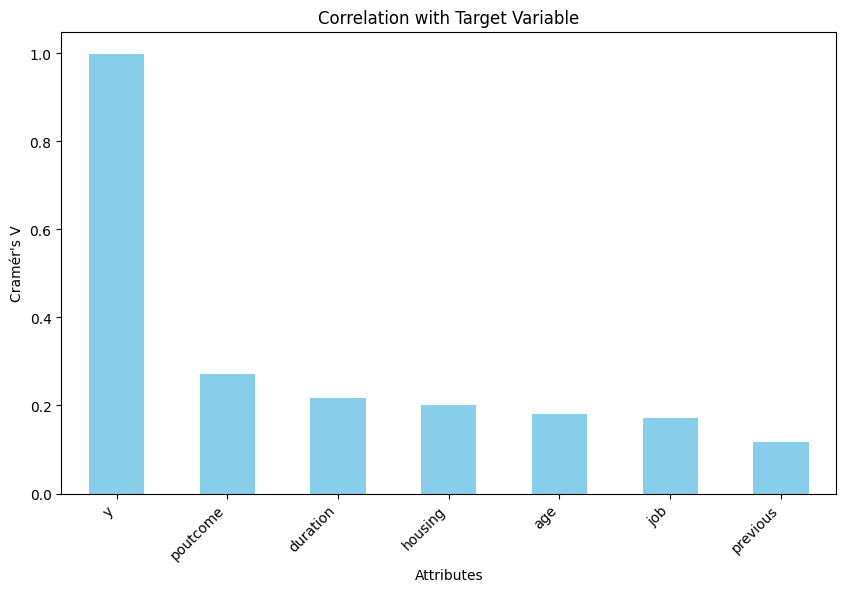

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate correlation with all variables using Cramér's V
cramer_corr = pd.Series({col: cramers_v(df[col], df['y']) for col in df.columns})

# Select top six attributes with the highest absolute correlation
top_six_attributes = cramer_corr.abs().nlargest(7)

# Plot the top six attributes with their correlation values
plt.figure(figsize=(10, 6))
top_six_attributes.plot(kind='bar', color='skyblue')
plt.title('Correlation with Target Variable')
plt.xlabel('Attributes')
plt.ylabel('Cramér\'s V')
plt.xticks(rotation=45, ha='right')
plt.show()



This displays the influence of each attribute in descending order on the target variable according cramer v method which does chi squared statistic.
poutcome has the highest influence on the target variable 'y' with 0.27.
The values for the remaining attributes against the target variable are as follows:
duration    0.216849
housing     0.202233
age         0.180676
job         0.171317
previous    0.116173
These are the six most influential attributes from the dataset on the target variable when the attributes are sorted according to descending order. poutcome has high association with target variable followed by duration,housing,age,job and previous according to this bar chart.




In [ ]:
df.dtypes

age           object
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome      object
y             object
dtype: object

In [ ]:
# Calculate the correlation with the target variable
from scipy.stats import chi2_contingency

# Calculate correlation with categorical variables using Chi-square test
categorical_corr = {}
for column in df.columns:
  #excluding target variable as correlation is calculated against target variable
    if column != 'y':
        contingency_table = pd.crosstab(df[column], df['y'])
        chi2, _, _, _ = chi2_contingency(contingency_table)
        categorical_corr[column] = chi2


The second code snippet calculates the chi-squared statistic directly for each pair of a categorical variable and the target variable 'y'. This statistic measures the independence between two categorical variables.

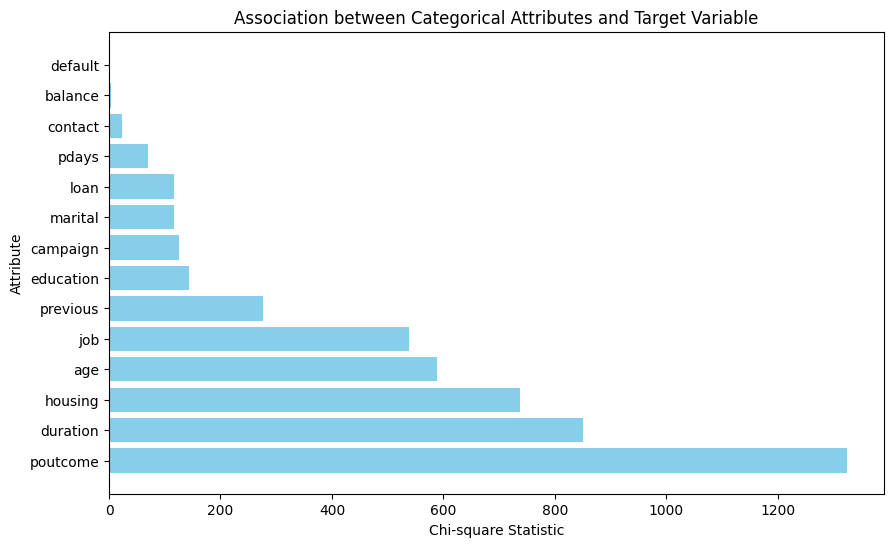

In [ ]:
import matplotlib.pyplot as plt

# Sorted the correlation values in descending order
sorted_corr = sorted(categorical_corr.items(), key=lambda x: x[1], reverse=True)

# Extract attribute names and correlation values
attributes = [item[0] for item in sorted_corr]
correlation_values = [item[1] for item in sorted_corr]

# Created a bar plot
plt.figure(figsize=(10, 6))
plt.barh(attributes, correlation_values, color='skyblue')
plt.xlabel('Chi-square Statistic')
plt.ylabel('Attribute')
plt.title('Association between Categorical Attributes and Target Variable')
plt.show()

This bar chart shows the correlation of each attribute with the target variable and it is sorted in descending order of chi square statistic. Higher chi square statistic suggests that there is stronger association between the attribute and the target variable. According to the horizontal bar chart highest correlation is between attribute and target variable, poutcome followed by duration, housing, age and previous. We also noticed that 'balance' and 'default' have no impact on target variable.

In [ ]:
#dropped these columns as bar chart suggested that these two columns have no influence on target variable 'y'
columns_to_drop = ['balance','default',]
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.head()

,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,middle-aged,blue-collar,single,secondary,no,no,cellular,0.0,2.0,0.0,0.0,other,no
1,middle-aged,management,divorced,tertiary,no,no,cellular,0.0,3.0,0.0,2.0,failure,no
2,middle-aged,services,single,tertiary,yes,no,cellular,1.0,1.0,1.0,3.0,other,no
3,middle-aged,management,divorced,tertiary,yes,no,cellular,0.0,2.0,0.0,0.0,other,no
4,young,management,single,tertiary,no,no,cellular,0.0,1.0,0.0,0.0,other,no


In [ ]:
#encoding values so that they can be converted to categorical values which will lead to better results while using decision trees
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features
df_encoded = df.copy()  # Make a copy of the original dataframe
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':  # Check if the column contains categorical values
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

In [ ]:
#splitting into train and test dataset
from sklearn.model_selection import train_test_split

# Separate independent features (X) and target attribute (y)
X = df_encoded.drop(columns=['y'])
y = df_encoded['y']

# Split the dataset into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
#experimenting with different values of max depth and min_leaf to find the values which give best accuracy
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15,20,25,30,35,50],  # Try different values for max_depth
    'min_samples_leaf': [1, 5, 10, 20,25,30,40]  # Try different values for min_samples_leaf
}

# Initialize the decision tree classifier
gini_tree = DecisionTreeClassifier(criterion='gini')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gini_tree, param_grid=param_grid, cv=5)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the model with the best parameters
best_tree = grid_search.best_estimator_
accuracy = best_tree.score(X_test, y_test)
print("Accuracy:", accuracy)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 40}
Accuracy: 0.7603911980440098


In [ ]:
#checked for gini and entropy with same max_depth and min_leaf values to compare them we noticed that gini performs slightly better than entropy. Accuracy of gini is 76.039 while accuracy of entropy is 75.92.
gini_tree = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=40)
gini_tree.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_gini = gini_tree.predict(X_test)

# Calculate accuracy of the model
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("Accuracy using Gini impurity:", accuracy_gini)

# Create and train DecisionTreeClassifier with entropy
entropy_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=40)
entropy_tree.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_entropy = entropy_tree.predict(X_test)

# Calculate accuracy of the model
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Accuracy using entropy:", accuracy_entropy)

Accuracy using Gini impurity: 0.7603911980440098
Accuracy using entropy: 0.7592798399644365


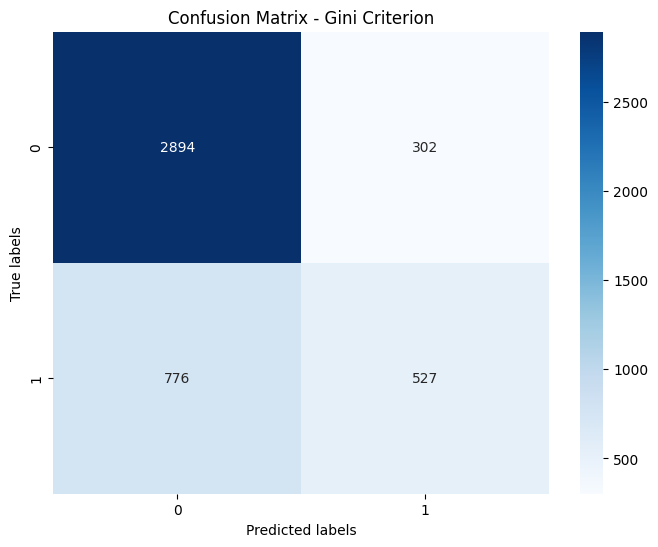

Classification Report - Gini Criterion:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84      3196
           1       0.64      0.40      0.49      1303

    accuracy                           0.76      4499
   macro avg       0.71      0.65      0.67      4499
weighted avg       0.74      0.76      0.74      4499



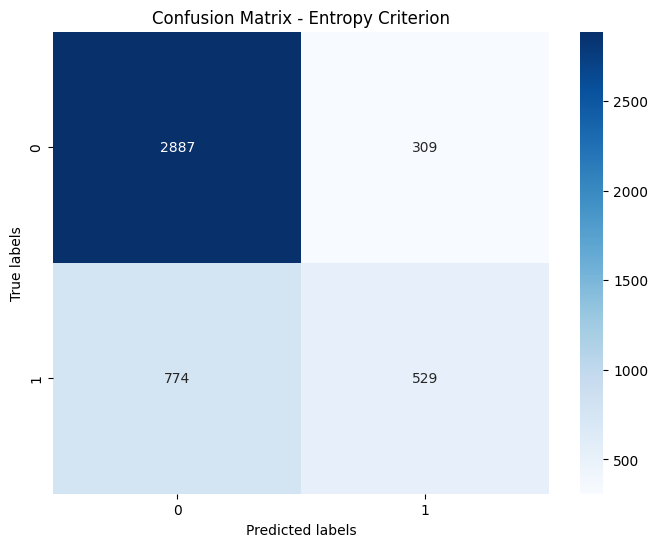

Classification Report - Entropy Criterion:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      3196
           1       0.63      0.41      0.49      1303

    accuracy                           0.76      4499
   macro avg       0.71      0.65      0.67      4499
weighted avg       0.74      0.76      0.74      4499

Comparison of Gini and Entropy Classifiers:
Accuracy (Gini): 0.7603911980440098
Accuracy (Entropy): 0.7592798399644365


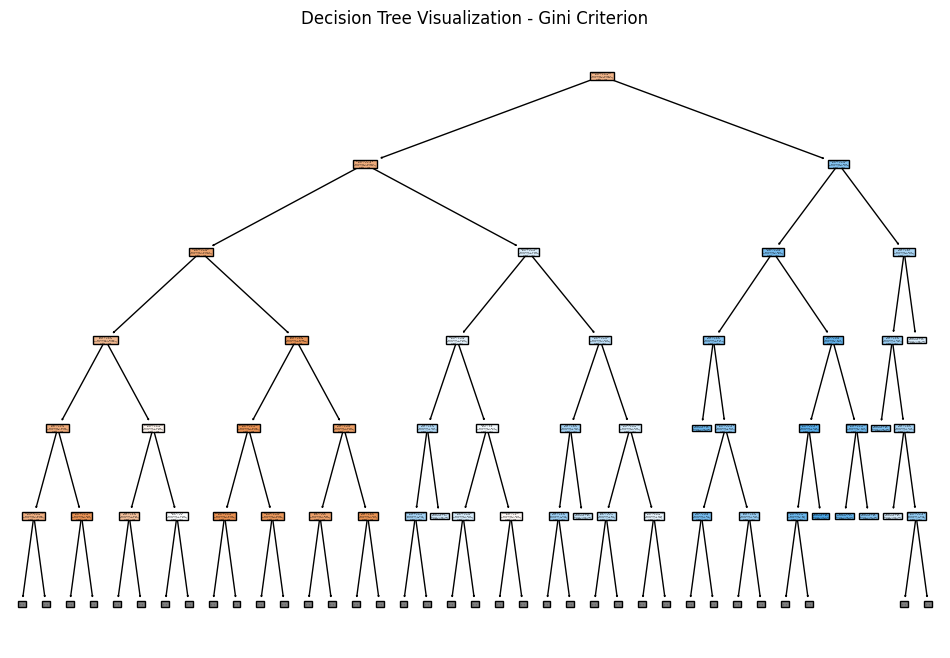

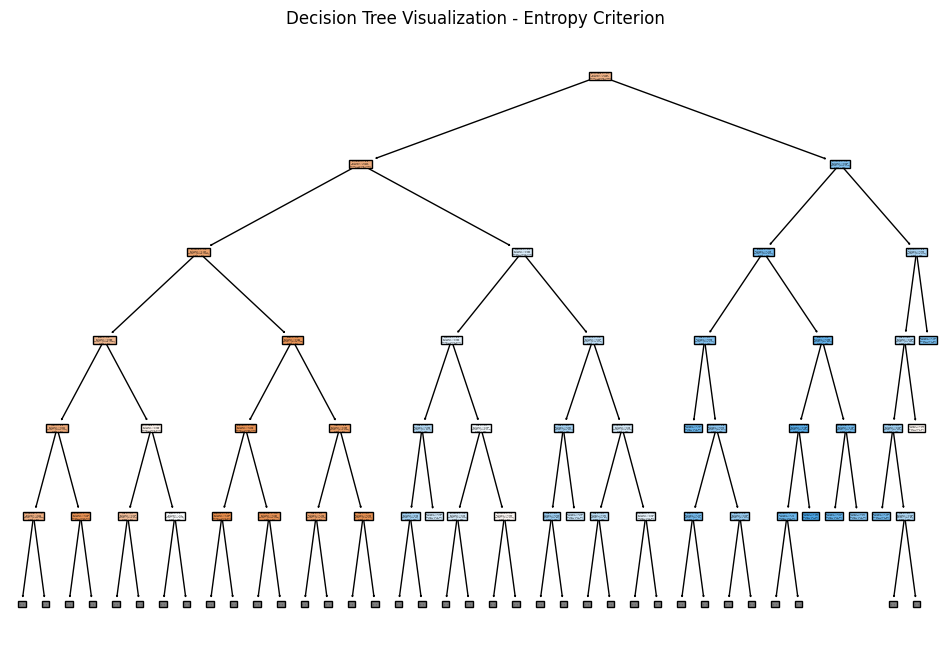

In [ ]:
#printing confusion matrix for each type of distnace metric
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Calculate confusion matrix for Gini criterion
y_pred_gini = best_tree.predict(X_test)
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)

# Plot confusion matrix for Gini criterion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gini, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Gini Criterion')
plt.show()

# Generate classification report for Gini criterion
classification_report_gini = classification_report(y_test, y_pred_gini)
print("Classification Report - Gini Criterion:")
print(classification_report_gini)

# Calculate confusion matrix for entropy criterion
best_tree_entropy = DecisionTreeClassifier(criterion='entropy', **best_params)
best_tree_entropy.fit(X_train, y_train)
y_pred_entropy = best_tree_entropy.predict(X_test)
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)

# Plot confusion matrix for entropy criterion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_entropy, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Entropy Criterion')
plt.show()

# Generate classification report for entropy criterion
classification_report_entropy = classification_report(y_test, y_pred_entropy)
print("Classification Report - Entropy Criterion:")
print(classification_report_entropy)

print("Comparison of Gini and Entropy Classifiers according to accuracy:")
print("Accuracy (Gini):", accuracy_score(y_test, y_pred_gini))
print("Accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))

# Print decision tree visualization with depth of 5 for Gini criterion
plt.figure(figsize=(12, 8))
plot_tree(best_tree, max_depth=5, filled=True, feature_names=X_train.columns, class_names=['No', 'Yes'])
plt.title('Decision Tree Visualization - Gini Criterion')
plt.show()

# Print decision tree visualization with depth of 5 for entropy criterion
plt.figure(figsize=(12, 8))
plot_tree(best_tree_entropy, max_depth=5, filled=True, feature_names=X_train.columns, class_names=['No', 'Yes'])
plt.title('Decision Tree Visualization - Entropy Criterion')
plt.show()


 Comparing gini and entropy values for confusion matrix

Precision for class 0 (no) is 0.79, for class 1 (yes) is 0.64. -gini
Precision for class 0 is 0.79, for class 1 is 0.63. - entropy
Recall for class 0 is 0.91, for class 1 is 0.40.- gini
Recall for class 0 is 0.90, for class 1 is 0.41.-entropy
F1-score for class 0 is 0.84, for class 1 is 0.49. - gini
F1-score for class 0 is 0.84, for class 1 is 0.49. - entropy
Accuracy for both gini and entropy is 0.76, macro average and weighted average of precision, recall, and F1-score are also consistent between both gini and entropy. There is no significant impact on the model's accuracy according to the distance measure chosen.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Defined the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Created the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Instantiated GridSearchCV
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best accuracy score found: ", best_score)

# Use the best model for predictions
best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test)

# Print confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Best accuracy score found:  0.7667117739293937
Confusion Matrix:
[[2888  308]
 [ 779  524]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      3196
           1       0.63      0.40      0.49      1303

    accuracy                           0.76      4499
   macro avg       0.71      0.65      0.67      4499
weighted avg       0.74      0.76      0.74      4499



Experimented with different parameters for random forest classifier to find the best accuracy.

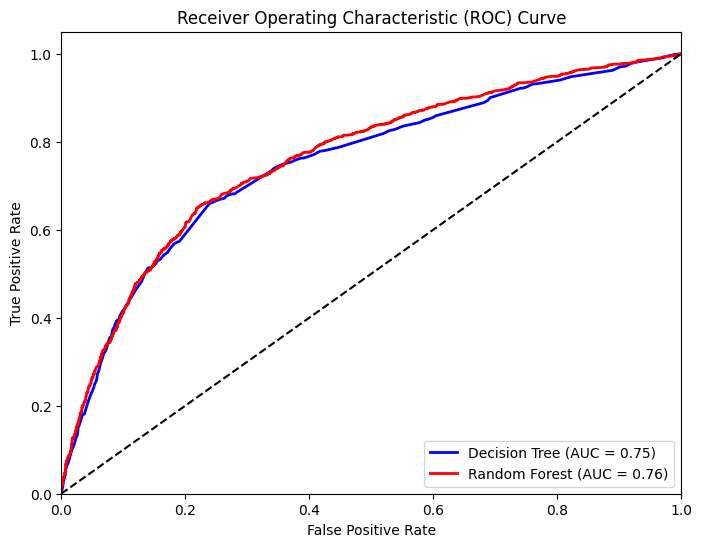

In [ ]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curves for both classifiers
fpr_dt, tpr_dt, _ = roc_curve(y_test, gini_tree.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_rfc, tpr_rfc, _ = roc_curve(y_test, best_rfc.predict_proba(X_test)[:, 1])
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rfc, tpr_rfc, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rfc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


plotted the roc curve for both classifiers and found that random forest has slightly more area under the curve which is 0.76 whereas decision tree has 0.75. More area under curve means the true positive rate and we can see that random forest consistently outperforms decision tree with a high positive rate for different thresholds.

Team members
Bindu Srivalli Nagineni - 1002175940
Sivani Tumuluri - 1002118984